In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:

# Load the data
job_data1 = pd.read_csv('job_data.csv')

In [4]:

# Convert published_date to datetime
job_data1['published_date'] = pd.to_datetime(job_data1['published_date'], errors='coerce')

In [5]:
# Drop rows with invalid dates
job_data1 = job_data1.dropna(subset=['published_date'])

In [6]:
# Extract year and month from the published_date
job_data1['year_month'] = job_data1['published_date'].dt.to_period('M')


C:\Users\pooji\AppData\Local\Temp\ipykernel_26108\584340400.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  job_data1['year_month'] = job_data1['published_date'].dt.to_period('M')


In [8]:
# Filter data for remote jobs
job_data1['keywords'] = job_data1['keywords'].fillna('')
remote_jobs = job_data1[job_data1['keywords'].str.contains('remote', case=False, na=False)]

# Group by year_month to get the count of remote job postings
monthly_remote_jobs = remote_jobs.groupby('year_month').size().reset_index(name='remote_job_postings')

# Ensure year_month is a string for plotting
monthly_remote_jobs['year_month'] = monthly_remote_jobs['year_month'].astype(str)

d:\Apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Apps\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


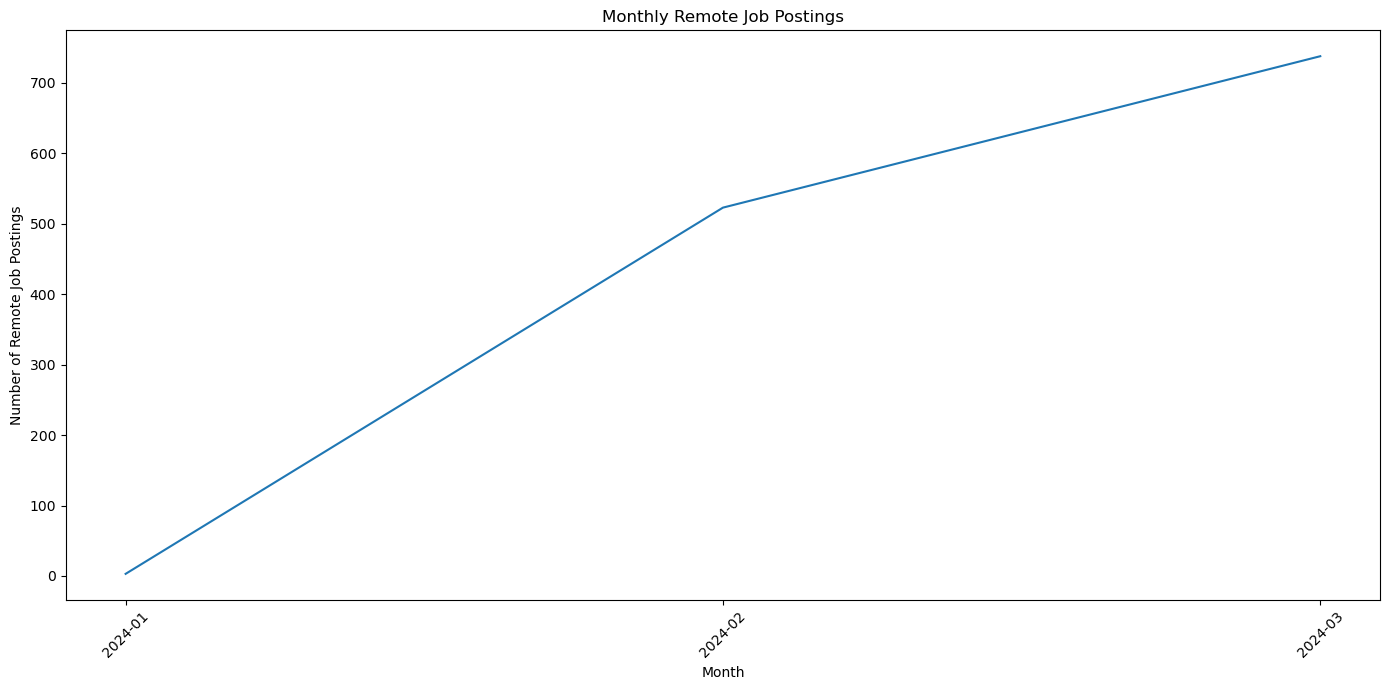

In [9]:
# Plot remote job postings over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_remote_jobs, x='year_month', y='remote_job_postings')
plt.title('Monthly Remote Job Postings')
plt.xlabel('Month')
plt.ylabel('Number of Remote Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('monthly_remote_job_postings.png')
plt.show()


In [10]:

# Forecasting remote job trends using Exponential Smoothing
monthly_remote_jobs['year_month'] = pd.PeriodIndex(monthly_remote_jobs['year_month'], freq='M').to_timestamp()

# Initialize seasonal values manually
seasonal_initial = monthly_remote_jobs['remote_job_postings'].rolling(window=12, min_periods=1).mean()

# Initial values for level and seasonal components
initial_level = monthly_remote_jobs['remote_job_postings'].iloc[0]
initial_seasonal = seasonal_initial.iloc[0]

model = ExponentialSmoothing(monthly_remote_jobs['remote_job_postings'], seasonal='add', seasonal_periods=12, 
                             initialization_method='known', initial_level=initial_level,
                             initial_seasonal=initial_seasonal)
fit = model.fit()
forecast = fit.forecast(12)


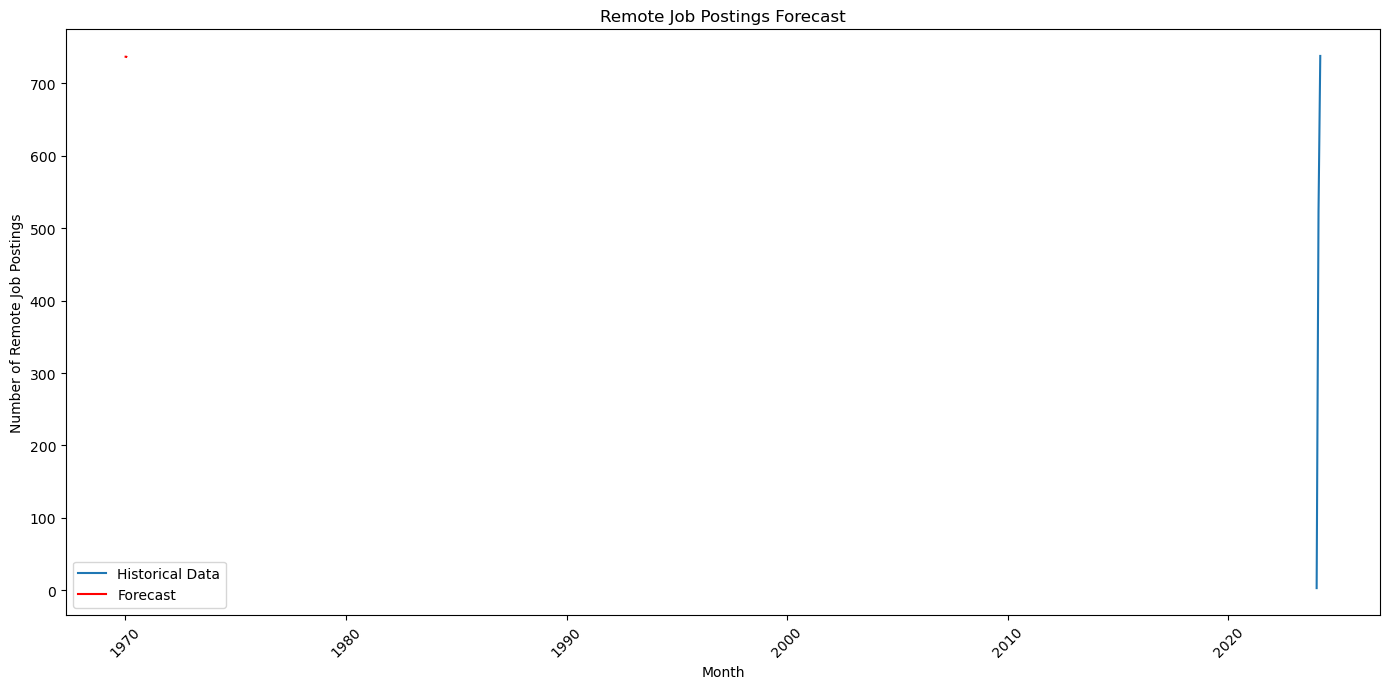

In [11]:

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(monthly_remote_jobs['year_month'], monthly_remote_jobs['remote_job_postings'], label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Remote Job Postings Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Remote Job Postings')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('remote_job_postings_forecast.png')
plt.show()